In [5]:
# first define the sigmod function for activate function
import numpy as np
def sig(x):
    return 1/(1+np.exp(-x))

def deri_sig(x):
    return x*(1-x)

print(sig(-10))

4.5397868702434395e-05


In [6]:
# data init
input_x = 1.0
init_w = 2.0
bias = 2.0
mu = 0.15
desired_out = 0.0


In [7]:
# generate output from input
def output_x(input_x, weight, bias):
    return sig((input_x*weight + bias ))

# cost function
def cost(output_x, desired_out):
    # print(0.5 * (output_x - desired_out)**2)
    return 0.5 * (output_x - desired_out)**2

def deri_cost(output_x, desired_out):
    return (output_x - desired_out)

# update weight and bias
def update_weight(weight, cost, learning_rate, output_x, desired_out, input_x):
    new_weight = weight - learning_rate*(input_x*deri_sig(output_x)*deri_cost(output_x, desired_out))
    return new_weight

def update_bias(weight, cost, learning_rate, output_x, desired_out):
    new_bias = weight - learning_rate*(deri_sig(output_x)*deri_cost(output_x, desired_out))
    return new_bias


print(output_x(input_x, init_w, bias))

0.9820137900379085


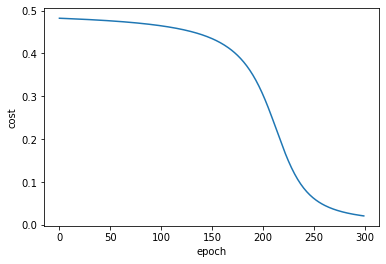

In [8]:
# let build the graph by matplotlib
import matplotlib.pyplot as plt
epoch = 300
costs = []
weight = init_w
for i in range(epoch):
    output_tmp = output_x(input_x, weight, bias)
    one_cost = cost(output_tmp, desired_out)
    costs.append(one_cost)
    # do update
    weight = update_weight(weight, one_cost, mu, output_tmp, desired_out, input_x)
    bias = update_bias(weight, one_cost, mu, output_tmp, desired_out)
    # print(weight, bias)

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(costs)
plt.show()

